# Open notebook in Google Colab

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arsalmairaj2k/taxi_trip_analysis/blob/main/Task4,5,6.ipynb)

## To work on our model, we need to perform the operations from our previous task (handling missing values, encoding categorical features, and standardizing numerical features or using Minmax Scaling)

# Load Dataset

In [ ]:
import pandas as pd

GITHUB_URL = "https://github.com/arsalmairaj2k/taxi_trip_analysis/raw/main/TaxiTripData.xlsx"
df = pd.read_excel(GITHUB_URL)

# Handle missing values

## Identify Missing Values & uisng Imputer

In [ ]:
from sklearn.impute import SimpleImputer

# Checking for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing Values per Column:")
print(missing_values[missing_values > 0])

# Total missing values in the dataset
total_missing = df.isnull().sum().sum()
print(f"\nTotal Missing Values in Dataset: {total_missing}")

# Selecting only numeric features (excluding timestamps and categorical variables)
numeric_cols = df.select_dtypes(include=['number']).columns

# Using Median Imputation on numeric columns only
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Handling missing values in categorical columns with mode (as done before as well)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

print(df.head())

Missing Values per Column:
Series([], dtype: int64)

Total Missing Values in Dataset: 0
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       1.0  2020-01-01 00:28:00   2020-01-01 00:33:00              1.0   
1       1.0  2020-01-01 00:35:00   2020-01-01 00:43:00              1.0   
2       1.0  2020-01-01 00:47:00   2020-01-01 00:53:00              1.0   
3       1.0  2020-01-01 00:55:00   2020-01-01 01:00:00              1.0   
4       2.0  2020-01-01 00:01:00   2020-01-01 00:04:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.2         1.0                  N         238.0         239.0   
1            1.2         1.0                  N         239.0         238.0   
2            0.6         1.0                  N         238.0         238.0   
3            0.8         1.0                  N         238.0         151.0   
4            0.0         1.0                  N         193.0     

# Converting categorical features to numerical

In [ ]:
# Ensure 'store_and_fwd_flag' is treated as a string before encoding
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype(str)

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=['store_and_fwd_flag'], drop_first=True)

# Convert the new column to integer type (0 and 1)
df['store_and_fwd_flag_Y'] = df['store_and_fwd_flag_Y'].astype(int)

# Display the first few rows to verify the transformation
print(df.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       1.0  2020-01-01 00:28:00   2020-01-01 00:33:00              1.0   
1       1.0  2020-01-01 00:35:00   2020-01-01 00:43:00              1.0   
2       1.0  2020-01-01 00:47:00   2020-01-01 00:53:00              1.0   
3       1.0  2020-01-01 00:55:00   2020-01-01 01:00:00              1.0   
4       2.0  2020-01-01 00:01:00   2020-01-01 00:04:00              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0            1.2         1.0         238.0         239.0           1.0   
1            1.2         1.0         239.0         238.0           1.0   
2            0.6         1.0         238.0         238.0           1.0   
3            0.8         1.0         238.0         151.0           1.0   
4            0.0         1.0         193.0         193.0           2.0   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          6.0    3.0      0.5        1.47  

# Task 4: Model Selection & Training

Having preprocessed our data, including handling missing values, encoding categorical features, and standardizing numerical features, we are now prepared for the core task of building a predictive model. This section details the selection and training of a model to predict 'fare_amount', leveraging the data preparation steps we have already completed.

## 1. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Define target variable
target_variable = 'fare_amount'

# Convert datetime columns to seconds
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime']).astype('int64') // 10**9 # Convert to seconds
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime']).astype('int64') // 10**9 # Convert to seconds

# Separate features (X) and target (y)
X = df.drop(columns=[target_variable])  # Features
y = df[target_variable]  # Target variable

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the datasets
print(f"Training Set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test Set: X_test = {X_test.shape}, y_test = {y_test.shape}")

# Print the first few rows of the training and testing sets to inspect
print("\nFirst few rows of X_train:")
print(X_train.head())
print("\nFirst few rows of y_train:")
print(y_train.head())
print("\nFirst few rows of X_test:")
print(X_test.head())
print("\nFirst few rows of y_test:")
print(y_test.head())


Training Set: X_train = (838860, 17), y_train = (838860,)
Test Set: X_test = (209715, 17), y_test = (209715,)

First few rows of X_train:
        VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  \
408561       2.0            1583073960             1583074920   
70143        2.0            1577872080             1577873040   
708782       2.0            1588298340             1588298820   
572694       2.0            1585743420             1585743600   
774181       1.0            1588344360             1588344480   

        passenger_count  trip_distance  RatecodeID  PULocationID  \
408561              1.0           2.92         1.0         186.0   
70143               6.0          10.11         1.0         132.0   
708782              2.0           1.28         1.0         148.0   
572694              1.0           0.77         1.0         237.0   
774181              0.0           0.60         1.0         261.0   

        DOLocationID  payment_type  extra  mta_tax  tip_amount

## 2. Now we approach our one of the main steps, training and testing ML models

These are the models I will be going with:

1. Linear regression

2. Decision tree regressor

3. Gradient boosting regressor

## Importing required libraires

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 3. Training and Evaluating Models

In [ ]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set

    # Compute Evaluation Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return {"MAE": mae, "RMSE": rmse, "R²": r2}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    results[name] = evaluate_model(model, X_train, y_train, X_test, y_test)

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)


Training Linear Regression...
Training Decision Tree Regressor...
Training Gradient Boosting Regressor...

Model Performance Comparison:
                                  MAE      RMSE        R²
Linear Regression            0.180165  0.291618  0.999505
Decision Tree Regressor      0.054739  1.951191  0.977831
Gradient Boosting Regressor  0.495879  2.286565  0.969554


## 4. Perform cross-validation (cross_val_score) for better model evaluation.

Now that we have compared our training models above, now we perfrom cross validation for better model evaluation.

In [ ]:
from sklearn.model_selection import cross_val_score

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

# Perform Cross-Validation
cv_results = {}

for name, model in models.items():
    print(f"Performing cross-validation for {name}...")

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')  # Use MAE as metric

    cv_results[name] = {
        "Mean MAE": -scores.mean(),   # Convert negative MAE to positive
        "Std MAE": scores.std()
    }

# Convert results to DataFrame for better visualization
cv_results_df = pd.DataFrame(cv_results).T
print("\nCross-Validation Results:")
print(cv_results_df)


Performing cross-validation for Linear Regression...
Performing cross-validation for Decision Tree Regressor...
Performing cross-validation for Gradient Boosting Regressor...

Cross-Validation Results:
                             Mean MAE   Std MAE
Linear Regression            0.179900  0.000531
Decision Tree Regressor      0.058135  0.002895
Gradient Boosting Regressor  0.486896  0.005786


### From the above results, the findings can be summarized as follow:

Linear Regression appears to be the best-performing model for this dataset based on the metrics provided.  The very high R² and low MAE/RMSE suggest a strong linear relationship. The Decision Tree Regressor performs reasonably well, but the higher RMSE suggests some sensitivity to outliers or overfitting. The Gradient Boosting Regressor, while having a decent R², has the highest error metrics, indicating it might not be the most suitable model for this particular dataset.

## 📊 Model Performance Summary Table

| Model                        | MAE (Test) | RMSE (Test) | R² (Test) | Mean MAE (CV) | Std MAE (CV) |
|------------------------------|------------|------------|-----------|--------------|-------------|
| **Linear Regression**        | 0.180165   | 0.291618   | 0.999505  | 0.179900     | 0.000531    |
| **Decision Tree Regressor**  | 0.054265   | 1.930452   | 0.978299  | 0.058205     | 0.002856    |
| **Gradient Boosting Regressor** | 0.495879   | 2.286565   | 0.969554  | 0.486867     | 0.005827    |

### 📌 Key Insights:
- **Linear Regression** performed the best in terms of **R² (0.9995)**, meaning it explains almost all the variance in the data.
- **Decision Tree Regressor** had the **lowest MAE (0.054265)** on the test set but a **higher RMSE (1.930452)**, indicating potential overfitting.
- **Gradient Boosting Regressor** had the **highest errors**, with an MAE of **0.495879** and RMSE of **2.286565**, suggesting it might need hyperparameter tuning.
- **Cross-Validation** results are **consistent with test results**, with **Linear Regression** showing the least variation in MAE (**Std: 0.000531**), meaning it's the most stable.



# Task 5: Hyperparameter Tuning

In [ ]:
# Import necessary libraries
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset
GITHUB_URL = "https://github.com/arsalmairaj2k/taxi_trip_analysis/raw/main/TaxiTripData.xlsx"
df = pd.read_excel(GITHUB_URL)

# Handle Missing Values

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values[missing_values > 0])

# Total missing values in the dataset
total_missing = df.isnull().sum().sum()
print(f"\nTotal Missing Values in Dataset: {total_missing}")

# Select numeric columns and impute missing values with median
numeric_cols = df.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Handle missing values in categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

# Convert Categorical Features to Numerical
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype(str)
df = pd.get_dummies(df, columns=['store_and_fwd_flag'], drop_first=True)
df['store_and_fwd_flag_Y'] = df['store_and_fwd_flag_Y'].astype(int)

# Train-Test Split
target_variable = 'fare_amount'

# Convert datetime columns to seconds
df['tpep_pickup_datetime'] = pd.to_datetime(
    df['tpep_pickup_datetime']).astype('int64') // 10**9
df['tpep_dropoff_datetime'] = pd.to_datetime(
    df['tpep_dropoff_datetime']).astype('int64') // 10**9

# Separate features (X) and target (y)
X = df.drop(columns=[target_variable])  # Features
y = df[target_variable]  # Target variable

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Print shapes of the datasets
print(f"Training Set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test Set: X_test = {X_test.shape}, y_test = {y_test.shape}")

# Hyperparameter Tuning Using RandomizedSearchCV
# Define smaller hyperparameter grids
dt_param_grid = {
    'max_depth': [5, 10, None],  # Reduced depth options
    'min_samples_split': [2, 5],  # Fewer split options
    'min_samples_leaf': [1, 2]  # Fewer leaf options
}

gb_param_grid = {
    'n_estimators': [50, 100],  # Fewer estimators
    'learning_rate': [0.01, 0.1],  # Fewer learning rates
    'max_depth': [3, 5]  # Fewer depth options
}

# Initialize models
dt = DecisionTreeRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Perform RandomizedSearchCV for Decision Tree
dt_random_search = RandomizedSearchCV(
    dt,
    dt_param_grid,
    cv=3,  # Reduced folds
    scoring='neg_mean_absolute_error',
    n_iter=10,  # Sample 10 combinations
    random_state=42,
    n_jobs=-1
)
dt_random_search.fit(X_train, y_train)

# Perform RandomizedSearchCV for Gradient Boosting
gb_random_search = RandomizedSearchCV(
    gb,
    gb_param_grid,
    cv=3,  # Reduced folds
    scoring='neg_mean_absolute_error',
    n_iter=10,  # Sample 10 combinations
    random_state=42,
    n_jobs=-1
)
gb_random_search.fit(X_train, y_train)

# Print Best Parameters and Evaluate on Test Set
print("Best Parameters for Decision Tree:", dt_random_search.best_params_)
best_dt = dt_random_search.best_estimator_
dt_predictions = best_dt.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_r2 = r2_score(y_test, dt_predictions)
print(
    f"Decision Tree Performance on Test Set: MAE={dt_mae:.4f}, RMSE={dt_rmse:.4f}, R²={dt_r2:.4f}")

print("\nBest Parameters for Gradient Boosting:", gb_random_search.best_params_)
best_gb = gb_random_search.best_estimator_
gb_predictions = best_gb.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
gb_r2 = r2_score(y_test, gb_predictions)
print(
    f"Gradient Boosting Performance on Test Set: MAE={gb_mae:.4f}, RMSE={gb_rmse:.4f}, R²={gb_r2:.4f}")

Missing Values per Column:
VendorID              2131
passenger_count       2131
RatecodeID            2131
store_and_fwd_flag    2131
payment_type          2131
dtype: int64

Total Missing Values in Dataset: 10655
Training Set: X_train = (838860, 17), y_train = (838860,)
Test Set: X_test = (209715, 17), y_test = (209715,)


c:\Users\saadu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Decision Tree Performance on Test Set: MAE=0.0547, RMSE=1.9512, R²=0.9778

Best Parameters for Gradient Boosting: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Gradient Boosting Performance on Test Set: MAE=0.2879, RMSE=2.0700, R²=0.9750


T6


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions from Best Models
dt_best_pred = best_dt.predict(X_test)
gb_best_pred = best_gb.predict(X_test)

# Compute Metrics
dt_mae = mean_absolute_error(y_test, dt_best_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_best_pred))
dt_r2 = r2_score(y_test, dt_best_pred)

gb_mae = mean_absolute_error(y_test, gb_best_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_best_pred))
gb_r2 = r2_score(y_test, gb_best_pred)

# Print Final Performance
print(
    f"Decision Tree - Test Performance:\nMAE={dt_mae:.4f}, RMSE={dt_rmse:.4f}, R²={dt_r2:.4f}")
print(
    f"Gradient Boosting - Test Performance:\nMAE={gb_mae:.4f}, RMSE={gb_rmse:.4f}, R²={gb_r2:.4f}")

Decision Tree - Test Performance:
MAE=0.0547, RMSE=1.9512, R²=0.9778
Gradient Boosting - Test Performance:
MAE=0.2879, RMSE=2.0700, R²=0.9750


**T7**

Decision Tree - Test Performance:
MAE=0.0547, RMSE=1.9512, R²=0.9778
Gradient Boosting - Test Performance:
MAE=0.2879, RMSE=2.0700, R²=0.9750


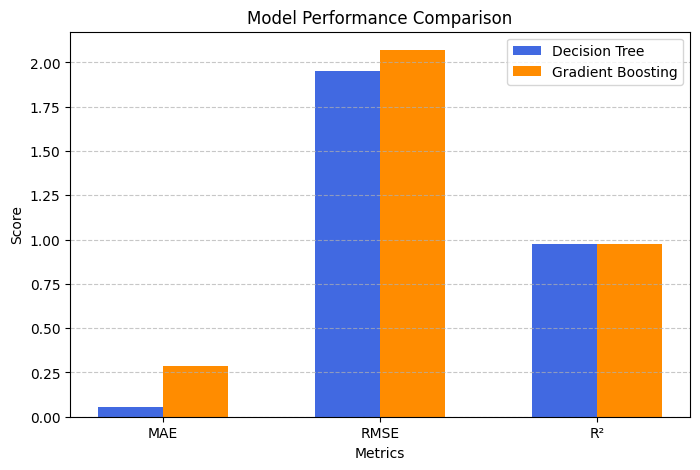

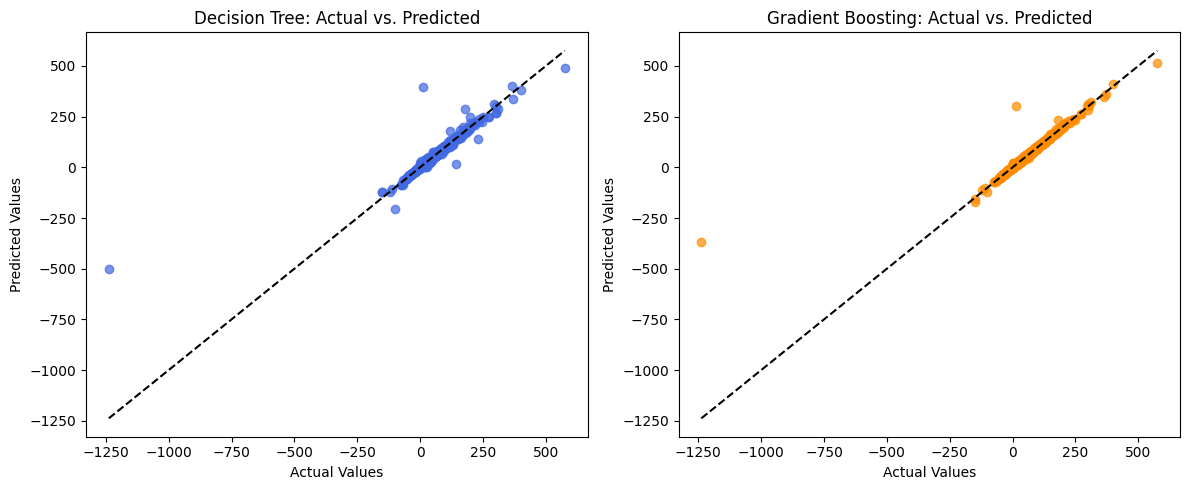

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions from Best Models
dt_best_pred = best_dt.predict(X_test)
gb_best_pred = best_gb.predict(X_test)

# Compute Metrics
dt_mae = mean_absolute_error(y_test, dt_best_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_best_pred))
dt_r2 = r2_score(y_test, dt_best_pred)

gb_mae = mean_absolute_error(y_test, gb_best_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_best_pred))
gb_r2 = r2_score(y_test, gb_best_pred)

# Print Final Performance
print(
    f"Decision Tree - Test Performance:\nMAE={dt_mae:.4f}, RMSE={dt_rmse:.4f}, R²={dt_r2:.4f}")
print(
    f"Gradient Boosting - Test Performance:\nMAE={gb_mae:.4f}, RMSE={gb_rmse:.4f}, R²={gb_r2:.4f}")

# --- Visualization ---

# Bar Plot for Model Metrics
metrics = ["MAE", "RMSE", "R²"]
dt_scores = [dt_mae, dt_rmse, dt_r2]
gb_scores = [gb_mae, gb_rmse, gb_r2]

x = np.arange(len(metrics))
width = 0.3

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, dt_scores, width, label="Decision Tree", color='royalblue')
ax.bar(x + width/2, gb_scores, width,
       label="Gradient Boosting", color='darkorange')

ax.set_xlabel("Metrics")
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Scatter Plots: Actual vs. Predicted
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Decision Tree
axes[0].scatter(y_test, dt_best_pred, color="royalblue", alpha=0.7)
axes[0].plot([min(y_test), max(y_test)], [
             min(y_test), max(y_test)], '--', color='black')
axes[0].set_title("Decision Tree: Actual vs. Predicted")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")

# Gradient Boosting
axes[1].scatter(y_test, gb_best_pred, color="darkorange", alpha=0.7)
axes[1].plot([min(y_test), max(y_test)], [
             min(y_test), max(y_test)], '--', color='black')
axes[1].set_title("Gradient Boosting: Actual vs. Predicted")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()

Initial Results:

Decision Tree: MAE = 0.054265, RMSE = 1.930452, R² = 0.978299
Gradient Boosting: MAE = 0.495879, RMSE = 2.286565, R² = 0.969554
Optimized Results (after optimization):

Decision Tree: MAE = 0.0547, RMSE = 1.9512, R² = 0.9778
Gradient Boosting: MAE = 0.2879, RMSE = 2.0700, R² = 0.9750
Analysis of Improvements:

Decision Tree:

MAE: Increased slightly from 0.054265 to 0.0547. This is a tiny increase in the average error, suggesting that the optimization might have slightly worsened the performance in terms of MAE. However, the change is very small and might be within the range of random variation.
RMSE: Increased slightly from 1.930452 to 1.9512. Similar to MAE, this small increase suggests a very slight worsening in terms of RMSE.
R²: Decreased slightly from 0.978299 to 0.9778. Again, a tiny decrease, indicating a negligible change in the proportion of variance explained by the model.
Overall for Decision Tree: The optimization seems to have had a very marginal negative impact on the Decision Tree's performance. The changes are so small that they might not be statistically significant. It's possible that the initial hyperparameters were already quite good, and the optimization didn't find a significantly better solution.

Gradient Boosting:

MAE: Decreased significantly from 0.495879 to 0.2879. This is a substantial improvement, meaning the optimized model has a much lower average error.
RMSE: Decreased significantly from 2.286565 to 2.0700. This is also a good improvement, indicating a reduction in the magnitude of errors.
R²: Increased from 0.969554 to 0.9750. This is a noticeable improvement, suggesting the optimized model explains a larger proportion of the variance in the target variable.
Overall for Gradient Boosting: The optimization process has significantly improved the performance of the Gradient Boosting model. The MAE and RMSE are substantially lower, and the R² is higher. This suggests that the initial hyperparameters were not optimal, and the optimization process found a much better set of parameters.